In [92]:
import numpy as np
import matplotlib.pyplot as plt

In [93]:
# Input data
v0 = 0; u0 = (50 + 12 + 1) / 30
step1 = 1; step2 = 0.5; step3 = 0.2
t0 = 0; tf = 20

In [94]:
#Analytical 
ua = lambda x: u0 * np.cos(x)
va = lambda x: -u0 * np.sin(x)

#Euler
def Eu(u, v, step):
  return([u + v * step, v - u * step])

#Leapfrog
def Lf(u0, u1, v0, v1, step):
  return([u0 + 2 * v1 * step, v0 - 2 * u1 * step])

In [95]:
# #Stability limit
N1 = int(tf / step1) + 1
u1 = np.zeros(N1); v1 = np.zeros(N1)
u1[0] = u0; v1[0] = v0
u1[1] = ua(step1); v1[1] = va(step1)

for i in range(2, N1):
  u1[i] = Lf(u1[i - 2], u1[i - 1], v1[i - 2], v1[i - 1], step1)[0]
  v1[i] = Lf(u1[i - 2], u1[i - 1], v1[i - 2], v1[i - 1], step1)[1]

#Stability limit/2
N2 = int(tf / step2) + 1
u2 = np.zeros(N2); v2 = np.zeros(N2)
u2[0] = u0; v2[0] = v0
u2[1] = ua(step2); v2[1] = va(step2)

for i in range(2, N2):
  u2[i] = Lf(u2[i - 2], u2[i - 1], v2[i - 2], v2[i - 1], step2)[0]
  v2[i] = Lf(u2[i - 2], u2[i - 1], v2[i - 2], v2[i - 1], step2)[1]


#Stability limit/5
N3 = int(tf / step3) + 1
u3 = np.zeros(N3); v3 = np.zeros(N3)
u3[0] = u0; v3[0] = v0
u3[1] = ua(step3); v3[1] = va(step3)

for i in range(2, N3):
  u3[i] = Lf(u3[i - 2], u3[i - 1], v3[i - 2], v3[i - 1], step3)[0]
  v3[i] = Lf(u3[i - 2], u3[i - 1], v3[i - 2], v3[i - 1], step3)[1]

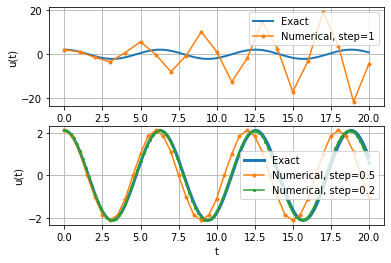

In [96]:
x = np.linspace(t0, tf, 200)
plt.figure()
plt.subplot(211)
plt.plot(x, ua(x), label = "Exact", linewidth = 2)  
plt.plot(np.linspace(t0, tf, N1), u1, '.-', label = "Numerical, step=1") 
plt.legend()
plt.grid()
plt.ylabel("u(t)")
plt.subplot(212)
plt.plot(x, ua(x), label = "Exact", linewidth = 3)  
plt.plot(np.linspace(t0, tf, N2), u2, '.-', label = "Numerical, step=0.5")
plt.plot(np.linspace(t0, tf, N3), u3, '.-', label = "Numerical, step=0.2", markersize = 4) 
plt.legend()
plt.grid()
plt.ylabel("u(t)")
plt.xlabel("t")
plt.savefig("2_1")

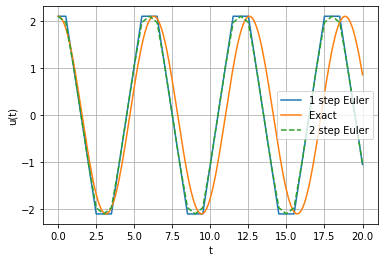

In [110]:
#Stability limit/2 + Euler
Ne = int(tf / step2) + 1
u2e = np.zeros(Ne); v2e = np.zeros(Ne)
u2e[0] = u0; v2e[0] = v0

#Euler step = main step
u2e[1] = Eu(u0, v0, step2)[0]; v2e[1] = Eu(u0, v0, step2)[1]

for i in range(2, Ne):
  u2e[i] = Lf(u2e[i - 2], u2e[i - 1], v2e[i - 2], v2e[i - 1], step2)[0]
  v2e[i] = Lf(u2e[i - 2], u2e[i - 1], v2e[i - 2], v2e[i - 1], step2)[1]

plt.plot(np.linspace(t0, tf, Ne), u2e, '-', label = "1 step Euler")  
plt.grid(True)
plt.ylabel("u(t)")
plt.xlabel("t") 

# #Euler step = main step / 2
u05 = Eu(u0, v0, step2 / 2)[0]; v05 = Eu(u0, v0, step2 / 2)[1]
u2e[1] = Eu(u05, v05, step2 / 2)[0]; v2e[1] = Eu(u05, v05, step2 / 2)[1]

for i in range(2, Ne):
  u2e[i] = Lf(u2e[i - 2], u2e[i - 1], v2e[i - 2], v2e[i - 1], step2)[0]
  v2e[i] = Lf(u2e[i - 2], u2e[i - 1], v2e[i - 2], v2e[i - 1], step2)[1]

x = np.linspace(t0, tf, 200)
plt.plot(x, ua(x), label = "Exact")  
plt.plot(np.linspace(t0, tf, Ne), u2e, '--', label = "2 step Euler")  
plt.legend()
plt.savefig("2_2")

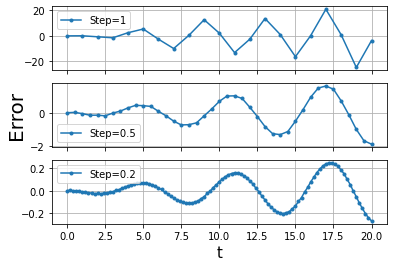

In [117]:
# loсal mistake, Euler step = main step / 10
Ne = 11
#Stability limit
N1 = int(tf / step1) + 1
u1 = np.zeros(N1); v1 = np.zeros(N1); er1 = np.zeros(N1)
u05 = np.zeros(Ne); v05 = np.zeros(Ne)
u1[0] = u0; v1[0] = v0
u05[0] = u0; v05[0] = v0

for i in range(1, Ne):
  u05[i] = Eu(u05[i - 1], v05[i - 1], step1 / 10)[0]
  v05[i] = Eu(u05[i - 1], v05[i - 1], step1 / 10)[1]

u1[1] = u05[Ne - 1]; v1[1] = v05[Ne - 1]; er1[1] = u1[1] - ua(step1)
for i in range(2, N1):
  u1[i] = Lf(u1[i - 2], u1[i - 1], v1[i - 2], v1[i - 1], step1)[0]
  v1[i] = Lf(u1[i - 2], u1[i - 1], v1[i - 2], v1[i - 1], step1)[1]
  er1[i] = u1[i] - ua(step1 * i)

plt.figure()
plt.subplot(311)
plt.plot(np.linspace(t0, tf, N1), er1, '.-', label = "Step=1") 
plt.grid(True)
plt.legend()
plt.tick_params('x', labelbottom=False)



# #Stability limit/2
N2 = int(tf / step2) + 1
u2 = np.zeros(N2); v2 = np.zeros(N2); er2 = np.zeros(N2)
u05 = np.zeros(Ne); v05 = np.zeros(Ne)
u2[0] = u0; v2[0] = v0
u05[0] = u0; v05[0] = v0

for i in range(1, Ne):
  u05[i] = Eu(u05[i - 1], v05[i-1], step2 / 10)[0]
  v05[i] = Eu(u05[i - 1], v05[i-1], step2 / 10)[1]

u2[1] = u05[Ne - 1]; v2[1] = v05[Ne - 1]; er2[1] = u2[1] - ua(step2)
for i in range(2, N2):
  u2[i] = Lf(u2[i - 2], u2[i - 1], v2[i - 2], v2[i - 1], step2)[0]
  v2[i] = Lf(u2[i - 2], u2[i - 1], v2[i - 2], v2[i - 1], step2)[1]
  er2[i] = u2[i] - ua(step2 * i)

plt.subplot(312)
plt.plot(np.linspace(t0, tf, N2), er2, '.-', label = "Step=0.5") 
plt.grid(True)
plt.ylabel("Error", size = 20)
plt.legend()
plt.tick_params('x', labelbottom=False)

#Stability limit/5
N3 = int(tf / step3) + 1
u3 = np.zeros(N3); v3 = np.zeros(N3); er3 = np.zeros(N3)
u05 = np.zeros(Ne); v05 = np.zeros(Ne)
u3[0] = u0; v3[0] = v0
u05[0] = u0; v05[0] = v0

for i in range(1, Ne):
  u05[i] = Eu(u05[i - 1], v05[i - 1], step3 / 10)[0]
  v05[i] = Eu(u05[i - 1], v05[i - 1], step3 / 10)[1]

u3[1] = u05[Ne - 1]; v3[1] = v05[Ne - 1]; er3[1] = u3[1] - ua(step3)
for i in range(2, N3):
  u3[i] = Lf(u3[i - 2], u3[i - 1], v3[i - 2], v3[i - 1], step3)[0]
  v3[i] = Lf(u3[i - 2], u3[i - 1], v3[i - 2], v3[i - 1], step3)[1]
  er3[i] = u3[i] - ua(step3 * i)


plt.subplot(313)
plt.plot(np.linspace(t0, tf, N3), er3, '.-', label = "Step=0.2") 
plt.grid(True)
plt.legend()
plt.xlabel("t", size = 15) 

plt.savefig("2_3")